In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

import bootstrap as bt
import boot_func as bf

# Bootstrap subpackage:
    
* uses numpy, mathplotlib packages   
* inherits statistical functions (mean, standard deviation, sample standard deviation) from stats subpackage
* makes simulations sampling via bootstrap method
* consists of two modules:
### 1. bootstrap_func - the module with functions:
    a) resample - function takes numpy array as input and returns an array with a sample of the size 1/3 of original array with replacement. The function is called in sample_distr function of the same module.
        
    b) sample_stand_err - function takes numpy array as input and returns a float, rounded to 4 decimal points sample standard error of the array. Sample standard error is counted with calling sample_std function from subpackage stats divided by the length of array to the power of 0.5.
    
    b) stand_err - function takes numpy array as input and returns a float, rounded to 4 decimal points standard error of the array. Standard error is counted with calling s_std function from subpackage stats divided by the length of array to the power of 0.5.
        
    c) sample_distr - function: 
        * takes numpy array as an input  
        * generates a new empty array sample_props 
        * via for loop 1000 times recamples the input array via resample function
        * fills up the sample_props array with the mean of each sample
        * returns sample_props array (with means of 10000 times recampled original array)
            
    d) b_plot - function that plots a mathplotlib histogram of the array with xlabel "Mean" and title "Simulated sampling distribution"
### 2. bootstrap - the module with class Bootstrap:
    a) __init__ - the class takes a numpy array or list of values as input and in case of list of values transfers it to numpy array to reduce the time complexity
    
    b) print_nums - prints out the original array
    
    c) mean - returns a float, rounded to 4 decimal points mean of the array. Mean is counted via s_mean function from subpackage stats.
    
    d) sd - returns a float, rounded to 4 decimal points standard deviation of the array. Standard deviation is counted via s_std function from subpackage stats
    
    e) s_se - returns a float, rounded to 4 decimal points sample standard error of the array. Standard error is counted via sample_std function from boot_func module
    
    f) simulation: 
        * calls the sample_distr function from boot_func module
        * prints out float, rounded to 4 decimal points theoretical mean (the mean of original array), float, rounded to 4 decimal points simulated mean (the mean of 10000 resampled arrays), float, rounded to 4 decimal points theoretical standard error, and float, rounded to 4 decimal points simulated standard error
        * plots a histogram of simulated means.
    

Original array: [350 279   7  43 227 159 295 251 462 266 163 308 442 407 452 206 283 356
  80 355 290  81  55  91 140 293 427 334 328 106 123 471  10 253 147  10
 437 119 351 320 144 327 284 227 189  65 238 372 297  33  86 320  69 472
 450 170 166 107  10  86 252 167  75 177 465 496 224 343 100  27 201  33
  26 370 301 449 488 295 114 380 372 466 323  32 199 245 134 231  58  82
  17 334  24  61 146 157 212  93 473  67  72 120 403 262 228 388 125 162
  99 469 173 272 486 283  96 454 398  29 242  35 113 286 331 174 262 184
 135 286 229 260 457  35 134 479 354 456  56 237  74 378  55 480 398 213
   4 213 296 310 328   0 284 293   5 423 333  12  16 247 460 289 128 178
 429 361 331 360 105 171  88 211 234 253 350 368 244 372  49  27 440 489
 239 156 356 402 206 395 334 213  32 447 296 320 198 298 379 135 196 269
 204  48  53 332 266 297 460 355 131 179 194 446  17 430  66  77 270 376
 317  38 476 145 317 352 388 392 493 200 339 260 484 222 448 194 383 201
 151 463 132  90  51 274 490 206 32

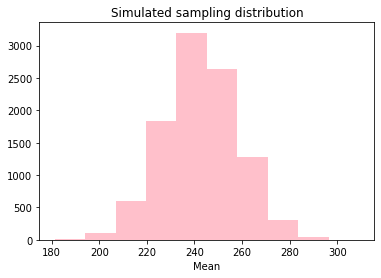

In [8]:
#Test of boot_func module:
x=np.random.randint(0,500,250)
print("Original array: {}".format(x))
#Call resample function
print("Resampled array {}".format(bf.resample(x)))
#Call sample standard error function
print("Sample standard error: {}".format(bf.sample_stand_err(x)))
#Call standard error function
print("Standard error: {}".format(bf.stand_err(x)))
#Call sample distribution function
sample=bf.sample_distr(x)
print("Sample distribution: {}".format(sample))
#Call b_plot function:
bf.b_plot(sample)

The original array is: [350 279   7  43 227 159 295 251 462 266 163 308 442 407 452 206 283 356
  80 355 290  81  55  91 140 293 427 334 328 106 123 471  10 253 147  10
 437 119 351 320 144 327 284 227 189  65 238 372 297  33  86 320  69 472
 450 170 166 107  10  86 252 167  75 177 465 496 224 343 100  27 201  33
  26 370 301 449 488 295 114 380 372 466 323  32 199 245 134 231  58  82
  17 334  24  61 146 157 212  93 473  67  72 120 403 262 228 388 125 162
  99 469 173 272 486 283  96 454 398  29 242  35 113 286 331 174 262 184
 135 286 229 260 457  35 134 479 354 456  56 237  74 378  55 480 398 213
   4 213 296 310 328   0 284 293   5 423 333  12  16 247 460 289 128 178
 429 361 331 360 105 171  88 211 234 253 350 368 244 372  49  27 440 489
 239 156 356 402 206 395 334 213  32 447 296 320 198 298 379 135 196 269
 204  48  53 332 266 297 460 355 131 179 194 446  17 430  66  77 270 376
 317  38 476 145 317 352 388 392 493 200 339 260 484 222 448 194 383 201
 151 463 132  90  51 274 490

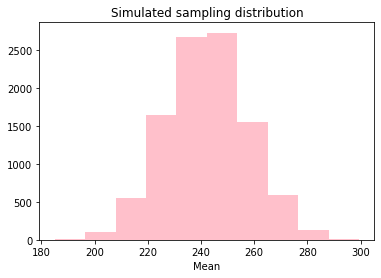

In [9]:
#Test of bootstrap module, using numpy array as input:
#Initialize the Bootstrap class
test=bt.Bootstrap(x)
#Call print_nums 
test.print_nums()
#Call mean
m=test.mean()
print("The mean of original array: {}".format(m))
#Call sd
s=test.sd()
print("The standard deviation of original array: {}".format(s))
#Call se
se=test.s_se()
print("The standard error of original array: {}".format(se))
#Call simulation
test.simulation()

Transfered the list to numpy array
The original array is: [16, 48, 21, 55, 35, 99, 47, 98, 81, 13, 31, 67, 46, 60, 51, 30, 15, 13, 97, 55, 23, 32, 62, 28, 12, 7, 11, 86, 35, 2, 41, 4, 46, 76, 40, 67, 89, 27, 64, 3, 12, 2, 4, 43, 92, 94, 42, 26, 50, 75]
The mean of original array: 43.46
The standard deviation of original array: 29.0112
The standard error of original array: 4.1445
Simulation results: 
Theoretical mean and simulated mean: 43.46,43.4511
Theoretical SE and simulated SE: 4.1445,7.3392


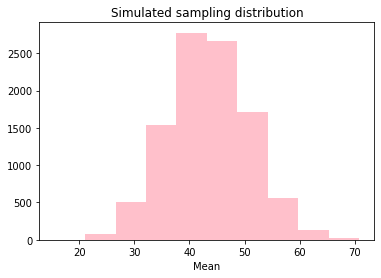

In [10]:
#Test of bootstrap module, using list as input
y=[16, 48, 21, 55, 35, 99, 47, 98, 81, 13, 31, 67, 46, 60, 51, 30, 15,
       13, 97, 55, 23, 32, 62, 28, 12,  7, 11, 86, 35,  2, 41,  4, 46, 76,
       40, 67, 89, 27, 64,  3, 12,  2,  4, 43, 92, 94, 42, 26, 50, 75]
test1=bt.Bootstrap(y)
#Call print_nums 
test1.print_nums()
#Call mean
m1=test1.mean()
print("The mean of original array: {}".format(m1))
#Call sd
s1=test1.sd()
print("The standard deviation of original array: {}".format(s1))
#Call se
se1=test1.s_se()
print("The standard error of original array: {}".format(se1))
#Call simulation
test1.simulation()